In [370]:
pip install colorama

# TUGAS MACHINE LEARNING

## KELOMPOK 2 :
### 1. Filipus Adriel Manik => 2109106096
### 2. Auzan Hawaari Fahrony => 2109106127
### 3. Muhammad Akbar Fahrezi => 2109106117

#1. Import Library yang akan digunakan


In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense, Input
from sklearn.ensemble import RandomForestClassifier
from colorama import Fore, Back, Style
sns.set_style('dark')

#2. Preprocessing and EDA


In [372]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##2.1 Data cleaning


In [373]:
df = df.drop('id', axis=1)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [375]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


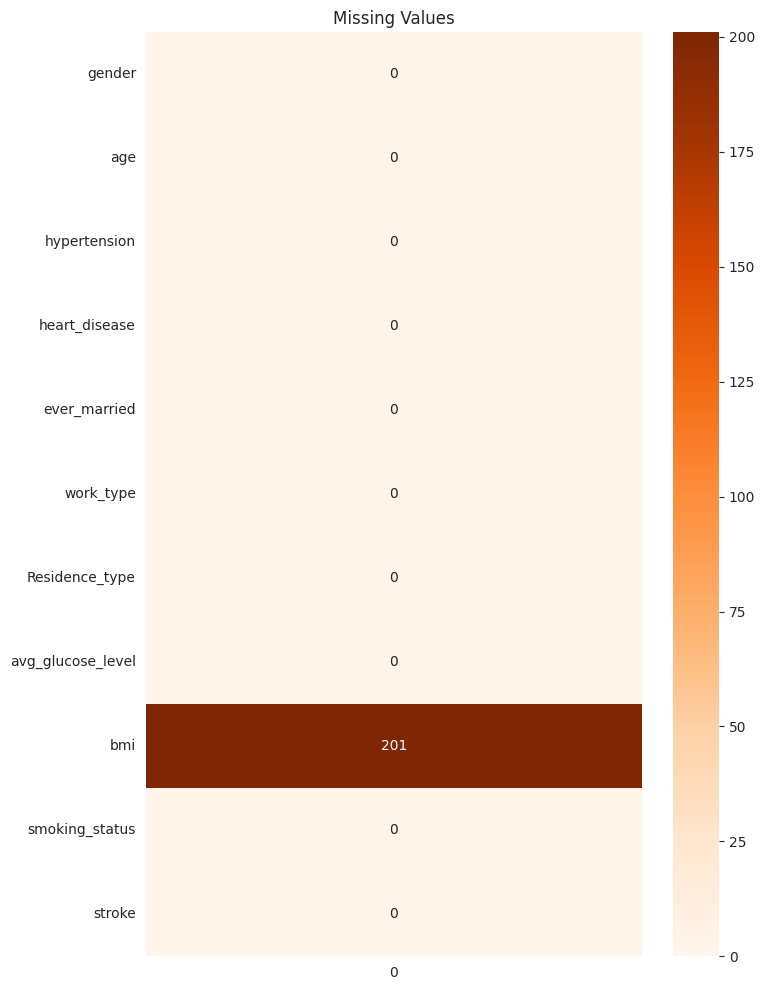

In [376]:
plt.figure(figsize=(8, 12), dpi=100)
plt.title('Missing Values')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='Oranges')
plt.show()

In [377]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [378]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [382]:
DT_BMI = Pipeline(steps=[('scale', StandardScaler()),
                         ('lr', DecisionTreeRegressor(random_state=42))])

x = df[['age','gender','bmi']].copy()

m = x[x.bmi.isna()]
x = x[~x.bmi.isna()]
y = x.pop('bmi')

DT_BMI.fit(x, y)

pred = pd.Series(DT_BMI.predict(m[['age','gender']]), index=m.index)

df.loc[m.index,'bmi'] = pred

In [383]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 2.2 Data Encoding & Transformation

### 2.2.1 Show Correlation before Encoding

<ipython-input-379-ca0b05125291>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)


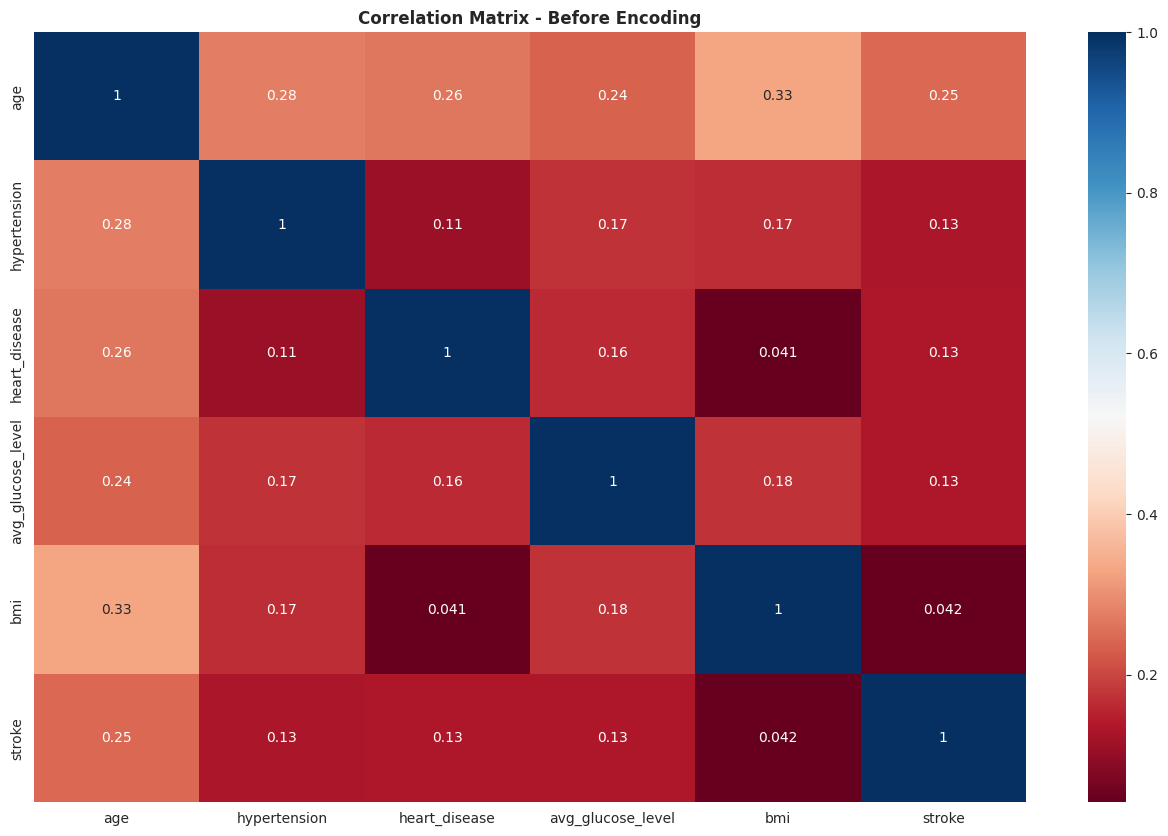

In [379]:
plt.figure(figsize = (16,10), dpi=100)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - Before Encoding', weight='bold')
plt.show()

In [380]:
df.gender = df.gender.replace({'Male':0,'Female':1}).astype(np.uint8)
df.Residence_type = df.Residence_type.replace({'Rural':0,'Urban':1}).astype(np.uint8)
df.work_type = df.work_type.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
df.smoking_status = df.smoking_status.replace({'never smoked':0,'smokes':1,'formerly smoked':2, 'Unknown':3}).astype(np.uint8)
df.ever_married = df.ever_married.replace({'No': 0, 'Yes': 1}).astype(np.uint8)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,2,1
1,1,61.0,0,0,1,1,0,202.21,NaN,0,1
2,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,1,49.0,0,0,1,0,1,171.23,34.4,1,1
4,1,79.0,1,0,1,1,0,174.12,24.0,0,1


### 2.2.2 Menampilkan korelasi data setelah Encoding

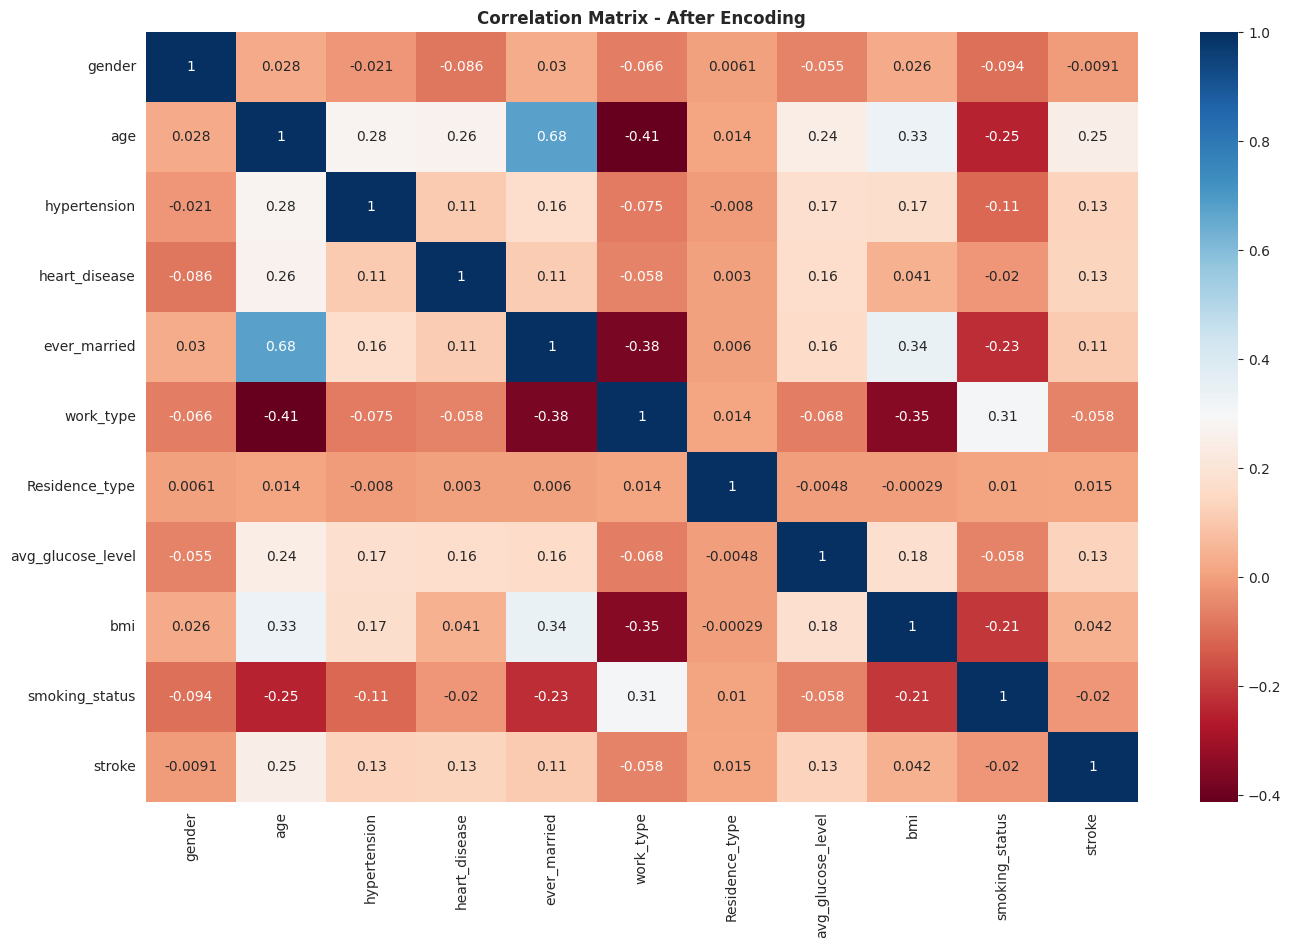

In [381]:
plt.figure(figsize = (16,10), dpi=100)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - After Encoding', weight='bold')
plt.show()

In [384]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.586025,43.229986,0.097475,0.054022,0.656293,0.838129,0.508123,106.140399,28.919686,1.407125,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.118746,0.499983,45.285004,7.732060,1.259667,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.700000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.880000,28.300000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.900000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


## 2.3 Menambah Sample agar membuat label stabil menggunakan SMOTE

In [385]:
upsample = SMOTE()

test_df  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(df.shape[0]*0.2),random_state=42)
train_df = df.drop(index=test_df.index)

X_test, y_test   = test_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], test_df['stroke']
X_train, y_train = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X_train, y_train = upsample.fit_resample(X_train, y_train)
upsampled_df = X_train.assign(Stroke = y_train)

X_test, y_test = upsample.fit_resample(X_test, y_test)
up_test_df = X_test.assign(Stroke = y_test)

### 2.3.1 Hasil dari Upsampling Menggunakan Smote

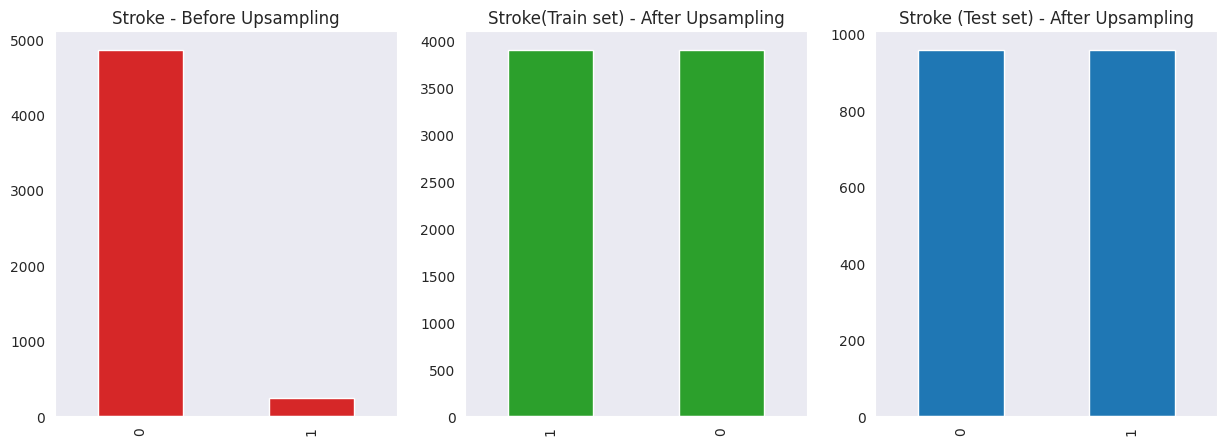

In [386]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(15, 5))

df.stroke.value_counts().plot(kind='bar', color='tab:red', title='Stroke - Before Upsampling', ax=axes[0])
upsampled_df.Stroke.value_counts().plot(kind='bar', color='tab:green', title='Stroke(Train set) - After Upsampling', ax=axes[1])
up_test_df.Stroke.value_counts().plot(kind='bar', color='tab:blue', title='Stroke (Test set) - After Upsampling', ax=axes[2]);

# MEMAKAI SUPERVISED LEARNING

## Menggunakan Metode :
### 1. Super Vector Machine
### 2. Random Forest Classifier
### 3. K Nearest Neighbor

### Membuat Fungsi untuk Train dan Fit semua model Sekaligus dan menampilkan hasil akurasi Training dan juga Akurasi validasi

In [388]:
def trainer(X_train, y_train, X_test, y_test):

    models = [[' SVM ', SVC()], [' Random Forest ', RandomForestClassifier()], [' KNN ', KNeighborsClassifier()]]
    scores = []

    for model_name, model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        cm_model = confusion_matrix(y_test, pred)
        scores.append(accuracy_score(y_test, pred))

        print(Back.YELLOW + Fore.BLACK + Style.BRIGHT + model_name)
        print(Back.RESET)
        print(cm_model)
        print('\n' + Fore.BLUE + 'Training Acc.  : ' + Fore.GREEN + str(round(accuracy_score(y_train, model.predict(X_train)) * 100, 2)) + '%' )
        print(Fore.BLUE + 'Validation Acc.: ' + Fore.RED + str(round(accuracy_score(y_test, pred) * 100, 2)) + '%\n' )
        print(Fore.CYAN + classification_report(y_test, pred))
        print('\n' + Fore.BLACK + Back.WHITE + '⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜\n')
    return scores

### Membuat Fungsi untuk memvisualisasikan Hasil akurasi tiap Model

In [389]:
def score_vis(score):

    names = ['SVM','Random Forest', 'KNN']

    plt.rcParams['figure.figsize']=20,8
    ax = sns.barplot(x=names, y=score, palette = "plasma", saturation =2.0)
    plt.xlabel('Model', fontsize = 20 )
    plt.ylabel('Accuracy(%)', fontsize = 20)
    plt.title('Model Comparison - Test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy()
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

### Memanggil Fungsi trainer untuk melatih label dan juga tribut

In [390]:
scores = trainer(X_train, y_train, X_test, y_test)

 SVM 

[[683 276]
 [209 750]]

Training Acc.  : 77.26%
Validation Acc.: 74.71%

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       959
           1       0.73      0.78      0.76       959

    accuracy                           0.75      1918
   macro avg       0.75      0.75      0.75      1918
weighted avg       0.75      0.75      0.75      1918


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 Random Forest 

[[883  76]
 [466 493]]

Training Acc.  : 100.0%
Validation Acc.: 71.74%

              precision    recall  f1-score   support

           0       0.65      0.92      0.77       959
           1       0.87      0.51      0.65       959

    accuracy                           0.72      1918
   macro avg       0.76      0.72      0.71      1918
weighted avg       0.76      0.72      0.71      1918


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 KNN 

[[784 175]
 [374 585]]

Training Acc.  : 92.53%
Validation Acc.: 71.38%

              pr

### Menampilkan dan membandingkan akurasi dari setiap Model yang dipakai

<ipython-input-389-fc7a5110bc98>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=names, y=score, palette = "plasma", saturation =2.0)


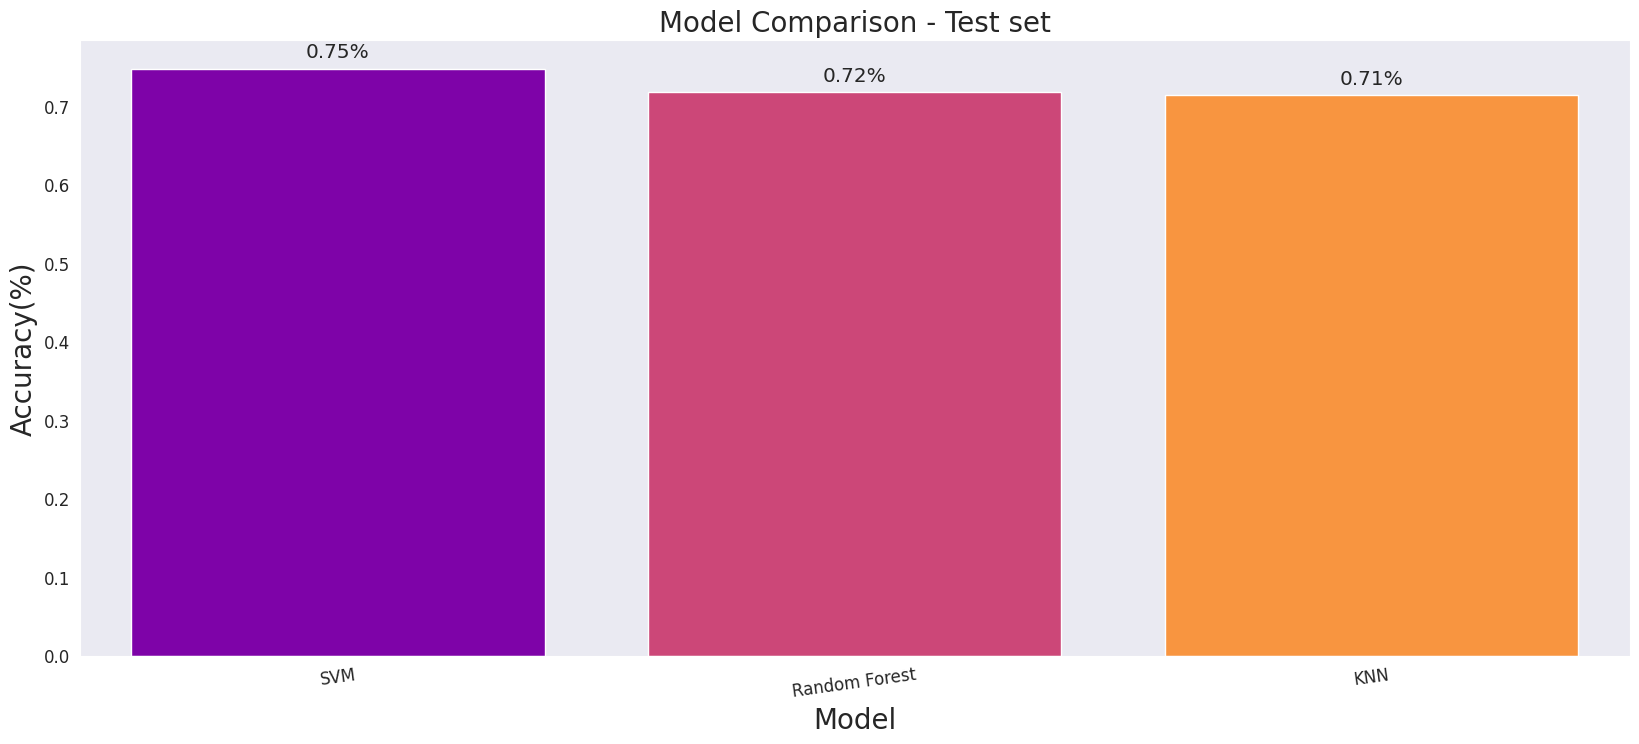

In [391]:
score_vis(scores)

# DNN ( DEEP NEURAL NETWORK )
## Implementasi menggunakan DNN

### Membuat Model

In [392]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(None, 7)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 7))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, None, 32)          256       
                                                                 
 dense_100 (Dense)           (None, None, 64)          2112      
                                                                 
 dense_101 (Dense)           (None, None, 128)         8320      
                                                                 
 dense_102 (Dense)           (None, None, 64)          8256      
                                                                 
 dense_103 (Dense)           (None, None, 32)          2080      
                                                                 
 dense_104 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 21057 (82.25 KB)
Trainable params: 2105

### Melakukan Training atau latihan untuk Model DNN

In [393]:
h = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
244/244 [==============================] - 5s 10ms/step - loss: 0.5898 - accuracy: 0.6992 - val_loss: 0.5279 - val_accuracy: 0.7143
Epoch 2/40
244/244 [==============================] - 3s 14ms/step - loss: 0.5028 - accuracy: 0.7480 - val_loss: 0.5021 - val_accuracy: 0.7362
Epoch 3/40
244/244 [==============================] - 3s 14ms/step - loss: 0.4815 - accuracy: 0.7656 - val_loss: 0.4920 - val_accuracy: 0.7471
Epoch 4/40
244/244 [==============================] - 3s 11ms/step - loss: 0.4659 - accuracy: 0.7721 - val_loss: 0.4856 - val_accuracy: 0.7664
Epoch 5/40
244/244 [==============================] - 3s 11ms/step - loss: 0.4446 - accuracy: 0.7858 - val_loss: 0.4822 - val_accuracy: 0.7649
Epoch 6/40
244/244 [==============================] - 3s 12ms/step - loss: 0.4426 - accuracy: 0.7918 - val_loss: 0.4841 - val_accuracy: 0.7680
Epoch 7/40
244/244 [==============================] - 4s 14ms/step - loss: 0.4237 - accuracy: 0.8007 - val_loss: 0.4491 - val_accuracy: 0.7727

### Evaluasi akurasi dari Training


In [394]:
y_pred = model.evaluate(X_test, y_test)

60/60 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7513


### Menampilkan perbandingan antara akurasi dan juga Val akurasi di dalam bentuk Plot

Text(0.5, 1.0, 'Training & Validation Acc.')

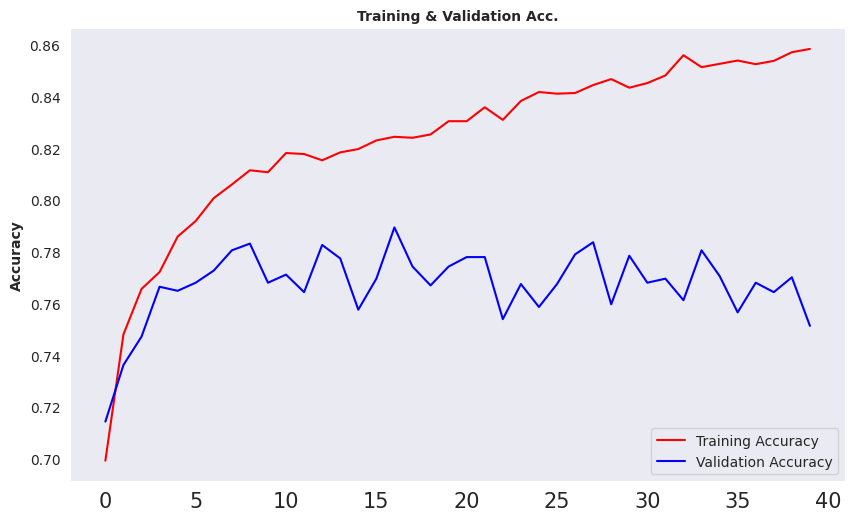

In [395]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.legend(loc='lower right', fontsize=10)
plt.ylabel('Accuracy', fontsize=10, weight='bold')
plt.title('Training & Validation Acc.', fontsize=10, weight='bold')




### Menampilkan perbandingan antara Loss dan juga Val Loss di dalam bentuk Plot

Text(0.5, 0, 'Epoch')

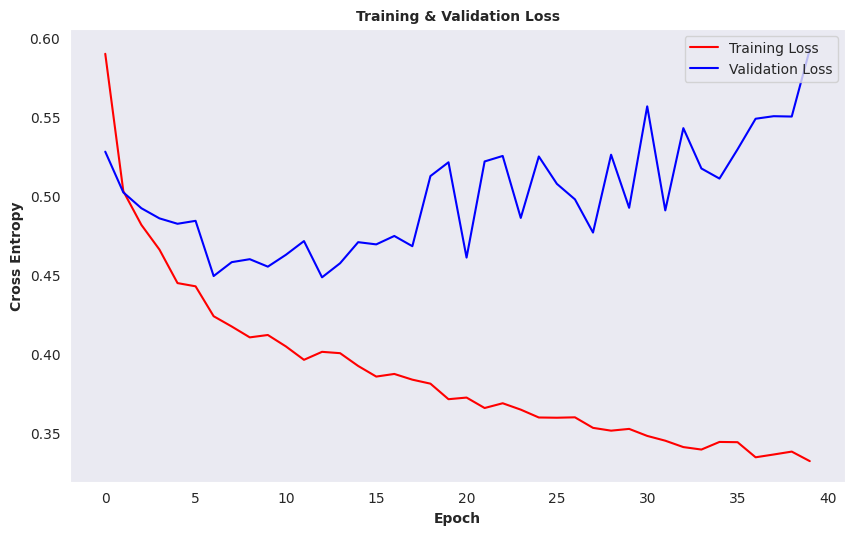

In [396]:
loss = h.history['loss']
val_loss = h.history['val_loss']

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 3)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('Cross Entropy', fontsize=10, weight='bold')
plt.title('Training & Validation Loss', fontsize=10, weight='bold')
plt.xlabel('Epoch', fontsize=10, weight='bold')

# Kesimpulan ( Conclusion ) => TODO

1. Data yang digunakan kurang bagus untuk dijadikan bahan latihan Machine learning dikarenakan sedikitnya korelasi antara fitur dan juga label.

2. Metode SVM menjadi metode yang lebih cocok dibandingkan dengan metode Random Forest dan juga KNN untuk bagian Supervised Learning dalam Project ini.

3. Sepertinya untuk DNN masih ada kendala di bagian Layer, sehingga mmembuat akurasi kurang bagus.

4. Kami juga perlu menyelidiki penanganan nilai null dan duplicated data. Perlu mencoba metode lain.

5. Oleh karena itu, Kami yakin masalah utama dari semua akurasi yang kurang bagus ini terdapat pada Data preprocessingnya, jadi Kami perlu menggunakan metode yang lebih efesien dan lebih bagus.

